In [1]:
# Import Python Package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Python Package for Scikit Learn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Import Python Package for Accuracy Calculations
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Import Python Package for Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading

In [2]:
# Read CSV file
df = pd.read_csv(r"C:\Users\sehja\Downloads\Untitled Folder\diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# Get information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
# check for missing values and calculate the percentage
missing_percentage = df.isnull().mean() * 100

# print the results
print(missing_percentage)

gender                 0.0
age                    0.0
hypertension           0.0
heart_disease          0.0
smoking_history        0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
diabetes               0.0
dtype: float64


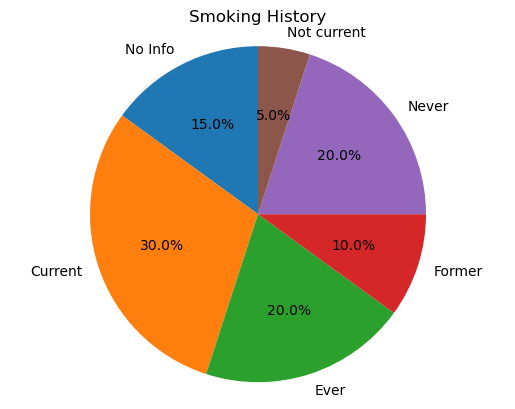

In [5]:
import matplotlib.pyplot as plt

# create data
labels = ['No Info', 'Current', 'Ever', 'Former', 'Never', 'Not current']
sizes = [15, 30, 20, 10, 20, 5]

# create pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# add title
plt.title('Smoking History')

# display plot
plt.show()


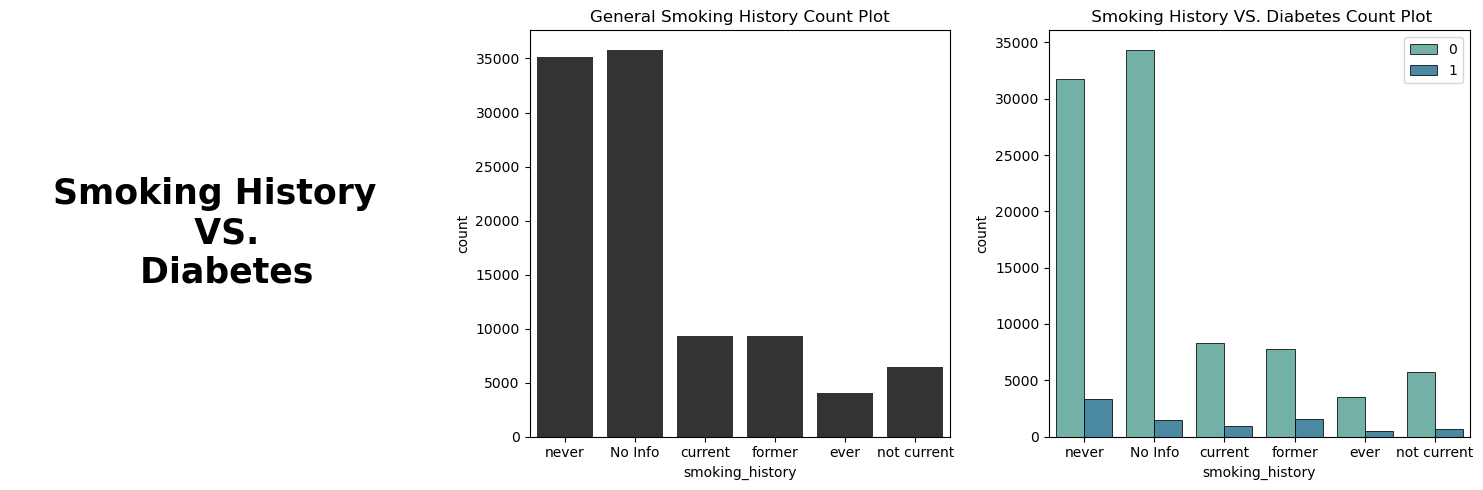

In [6]:
fig = plt.figure(figsize = (15,5))

ax = plt.subplot(1,3,1)
ax.text(0.5, 0.5, "Smoking History \n  VS. \n Diabetes", fontdict={'fontsize': 25, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.set_facecolor("#97C8A7")
ax.axis('off')



plt.subplot(1,3, 2)
counts = df['smoking_history'].value_counts().reset_index().sort_values(by = 'smoking_history', ascending = False)
sns.countplot(x = 'smoking_history', data = df, color = "black", alpha = 0.8, saturation =1)
plt.title("General Smoking History Count Plot")


plt.subplot(1,3, 3)
sns.countplot( x =df['smoking_history'] , hue = df['diabetes'] ,   palette='crest', linewidth = 0.7, edgecolor = 'k', saturation =1, alpha = 0.8)
plt.title(" Smoking History VS. Diabetes Count Plot")



plt.legend()
plt.tight_layout()
plt.show()

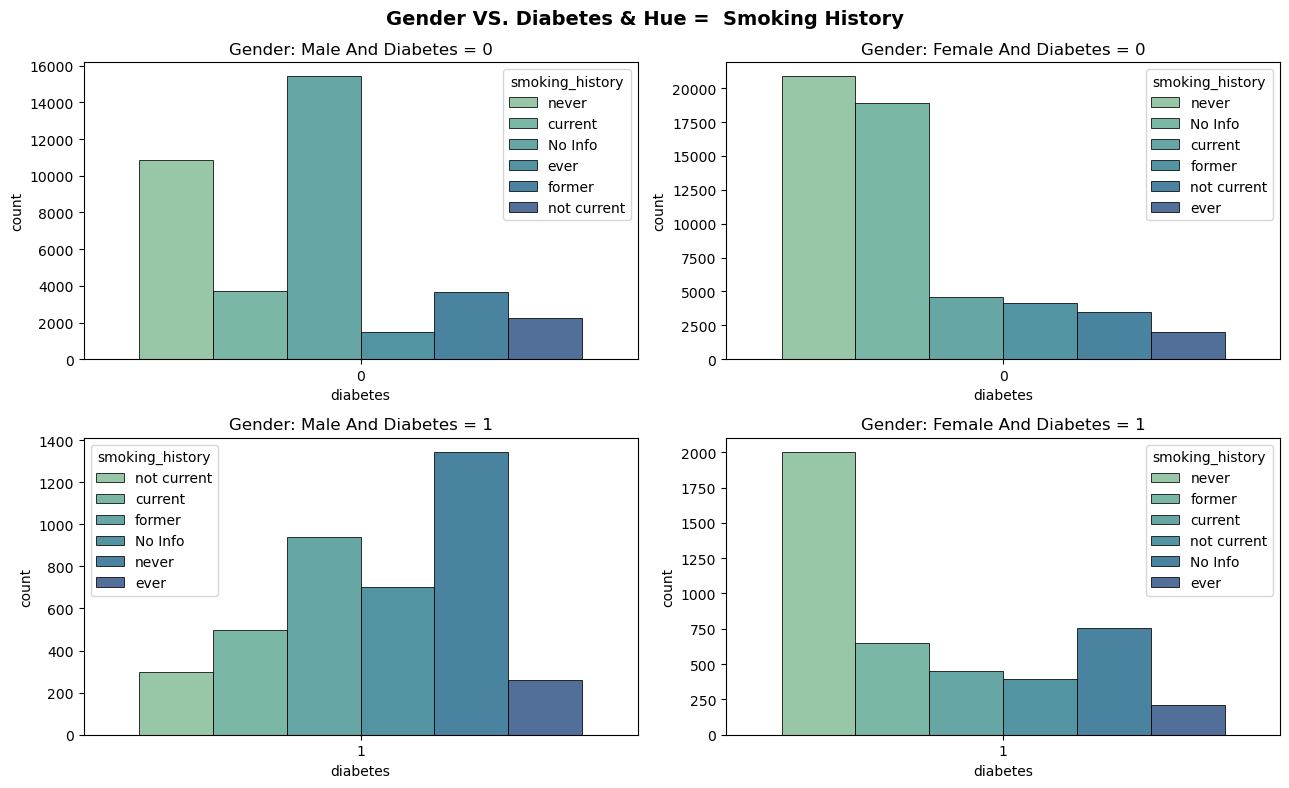

In [7]:
fig = plt.figure(figsize = (13,8))

df_male = df[(df.gender == 'Male') & (df.diabetes == 0)]
plt.subplot(2,2,1)
sns.countplot(x= df_male.diabetes, hue = df_male.smoking_history,  linewidth = 0.7, edgecolor = 'k', saturation =1, palette='crest', alpha =0.8)
plt.title("Gender: Male And Diabetes = 0")

plt.subplot(2,2,2)
df_female = df[(df.gender == 'Female') & (df.diabetes == 0)]
sns.countplot(x= df_female.diabetes, hue = df_female.smoking_history,  linewidth = 0.7, edgecolor = 'k', saturation =1, palette='crest', alpha =0.8)
plt.title("Gender: Female And Diabetes = 0")

df_male = df[(df.gender == 'Male') & (df.diabetes == 1)]
plt.subplot(2,2,3)
sns.countplot(x= df_male.diabetes, hue = df_male.smoking_history,  linewidth = 0.7, edgecolor = 'k', saturation =1, palette='crest', alpha =0.8)
plt.title("Gender: Male And Diabetes = 1")

plt.subplot(2,2,4)
df_female = df[(df.gender == 'Female') & (df.diabetes == 1)]
sns.countplot(x= df_female.diabetes, hue = df_female.smoking_history,  linewidth = 0.7, edgecolor = 'k', saturation =1, palette='crest', alpha =0.8)
plt.title("Gender: Female And Diabetes = 1")
fig.suptitle("Gender VS. Diabetes & Hue =  Smoking History", fontsize=14, fontweight='bold')





plt.tight_layout()

plt.show()


C:\Users\sehja\AppData\Local\Temp\ipykernel_17868\3348696042.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


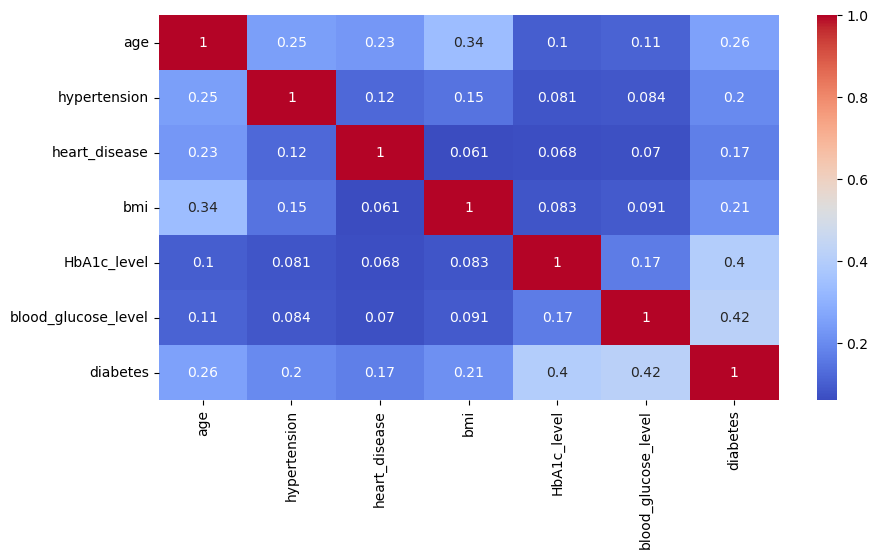

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
import pandas as pd

# select the columns that you want to one-hot encode
cols_to_encode = ['gender', 'smoking_history']

# perform one-hot encoding on the selected columns
df_encoded = pd.get_dummies(df, columns=cols_to_encode)

# print the encoded dataframe
print(df_encoded.head())


    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Female  gender_Male  gender_Other  \
0         0              1            0             0   
1         0              1            0             0   
2         0              0            1             0   
3         0              1            0             0   
4         0              0            1             0   

   smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                        0                        0                     0   
1               

In [10]:
# Get information about dataframe
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  float64
 1   hypertension                 100000 non-null  int64  
 2   heart_disease                100000 non-null  int64  
 3   bmi                          100000 non-null  float64
 4   HbA1c_level                  100000 non-null  float64
 5   blood_glucose_level          100000 non-null  int64  
 6   diabetes                     100000 non-null  int64  
 7   gender_Female                100000 non-null  uint8  
 8   gender_Male                  100000 non-null  uint8  
 9   gender_Other                 100000 non-null  uint8  
 10  smoking_history_No Info      100000 non-null  uint8  
 11  smoking_history_current      100000 non-null  uint8  
 12  smoking_history_ever         100000 non-null  uint8  
 13  

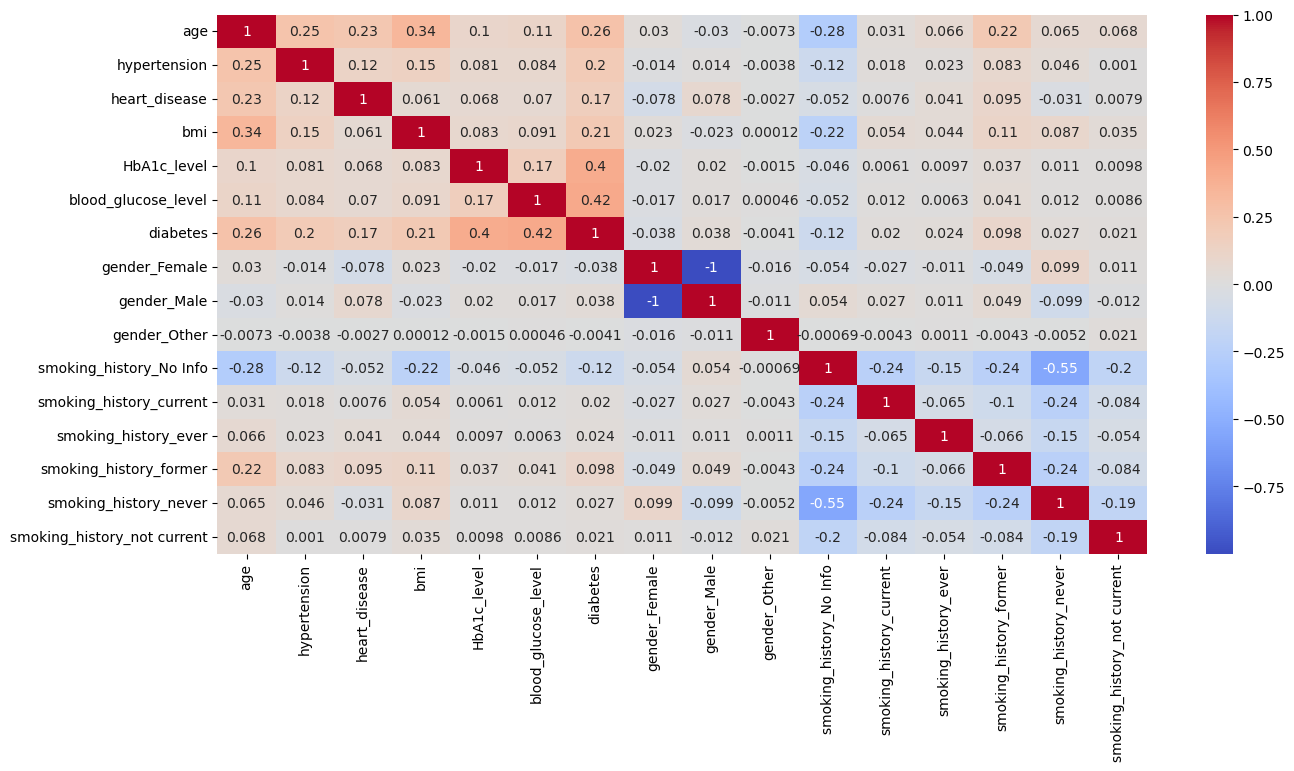

In [11]:
plt.figure(figsize=(15,7))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

In [12]:
# get the correlation values between the 'Total Unemployment in State/Area' column and all other columns
corr_values = df_encoded.corr()['diabetes']

# get the columns with the highest positive correlation
corr_values.nlargest(n=5)


diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
age                    0.258008
bmi                    0.214357
Name: diabetes, dtype: float64

In [13]:

# Selection of Input and Output Parameters
X = df_encoded[[ "blood_glucose_level","age"]]
y = df_encoded["diabetes"]

In [14]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis of each feature in X
skews = skew(X, axis=0)
kurtoses = kurtosis(X, axis=0)

# Print the results
print("Skewness:", skews)
print("Kurtosis:", kurtoses)

Skewness: [ 0.82164263 -0.05197822]
Kurtosis: [ 1.73747668 -1.00384482]


In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# create a logistic regression model
log_reg = LogisticRegression()

# train the model using the training data
log_reg.fit(X_train, y_train)

# make predictions on the testing data
y_pred = log_reg.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.94035


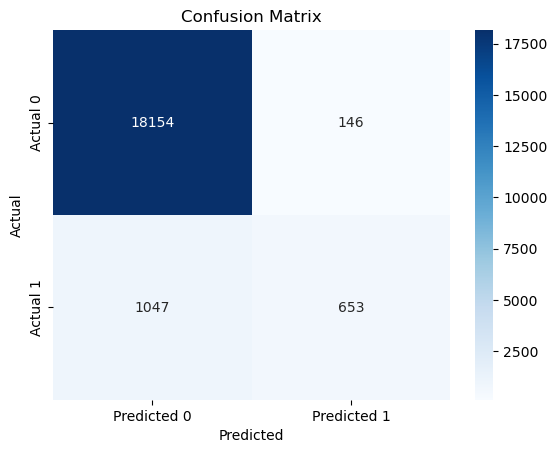

[[18154   146]
 [ 1047   653]]


In [16]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create a dataframe from the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# plot the confusion matrix as a heatmap
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# print the confusion matrix
print(cm)


In [17]:
from sklearn.metrics import classification_report

# calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred)

# print the report
print(report)


              precision    recall  f1-score   support

           0       0.95      0.99      0.97     18300
           1       0.82      0.38      0.52      1700

    accuracy                           0.94     20000
   macro avg       0.88      0.69      0.75     20000
weighted avg       0.93      0.94      0.93     20000



In [18]:
# PyCaret is an open-source machine learning library that is designed to simplify the end-to-end machine learning process.
# It is built on top of well-known Python libraries such as scikit-learn, XGBoost, LightGBM, and CatBoost, and offers a 
# simplified and streamlined approach to machine learning modeling.

In [19]:
from pycaret.classification import *

In [20]:
df2 = df_encoded.copy()

In [21]:
s = setup(df2, target = 'diabetes', session_id = 123)
best = compare_models()

# AUC (Area Under the Curve): a measure of the model's ability to distinguish between the positive and negative classes.
# Kappa:measure agreement between the model's predictions and the true labels taking into account the possibility of agreement occurring by chance.
# MCC (Matthews Correlation Coefficient): a measure of the correlation between the model's predictions and the true labels.
# TT (Training Time): the time taken to train the model.

,Description,Value
0,Session id,123
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(100000, 16)"
4,Transformed data shape,"(100000, 16)"
5,Transformed train set shape,"(70000, 16)"
6,Transformed test set shape,"(30000, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9721,0.9788,0.6817,0.9849,0.8057,0.7912,0.8068,0.0590
lightgbm,Light Gradient Boosting Machine,0.9720,0.9784,0.6911,0.9708,0.8074,0.7927,0.8061,0.1330
ada,Ada Boost Classifier,0.9718,0.9789,0.6859,0.9752,0.8053,0.7906,0.8049,0.0620
xgboost,Extreme Gradient Boosting,0.9713,0.9775,0.6950,0.9550,0.8045,0.7894,0.8010,0.0570
rf,Random Forest Classifier,0.9700,0.9594,0.6864,0.9455,0.7953,0.7796,0.7912,0.0930
et,Extra Trees Classifier,0.9663,0.9519,0.6808,0.8982,0.7745,0.7567,0.7652,0.1490
lr,Logistic Regression,0.9600,0.9612,0.6249,0.8680,0.7265,0.7055,0.7167,0.4710
lda,Linear Discriminant Analysis,0.9564,0.9534,0.5867,0.8547,0.6956,0.6730,0.6870,0.0510
knn,K Neighbors Classifier,0.9538,0.8782,0.5318,0.8758,0.6617,0.6385,0.6614,0.3500
dt,Decision Tree Classifier,0.9507,0.8542,0.7375,0.6997,0.7180,0.6910,0.6914,0.0520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

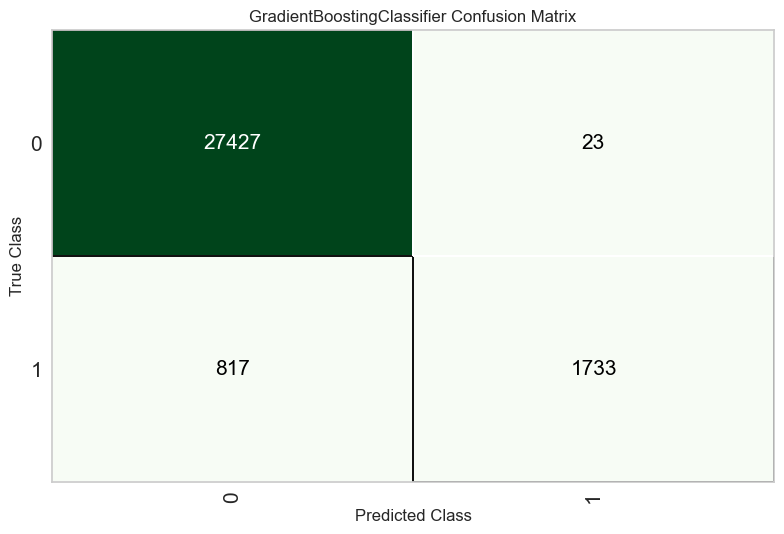

In [22]:
plot_model(best, plot = 'confusion_matrix')

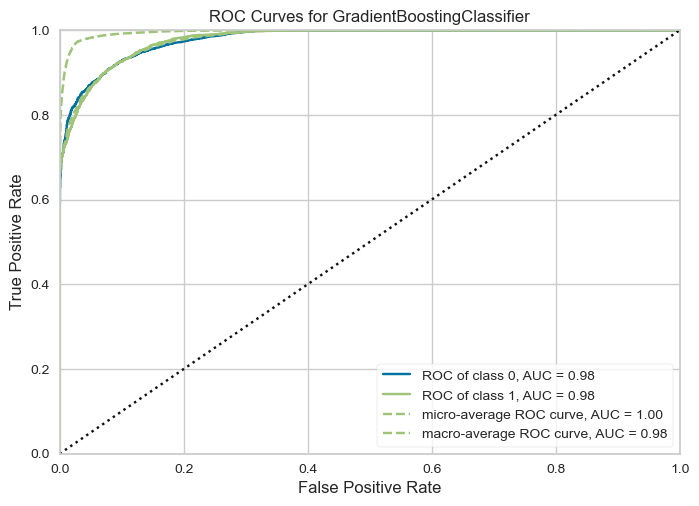

In [23]:
plot_model(best, plot = 'auc')

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_curve, PrecisionRecallDisplay
from sklearn.pipeline import Pipeline

model = XGBClassifier(random_state = 42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [25]:
def report_model(model):
    y_train_repo = model.predict(X_train)
    y_test_repo = model.predict(X_test)
    print(f"the accuracy on train set {accuracy_score(y_train, y_train_repo)}")
    print(f"the accuracy on test set {accuracy_score(y_test, y_test_repo)}")
    print()
    print(classification_report(y_test , y_test_repo))
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_repo)).plot()
    plt.show()

the accuracy on train set 0.9477
the accuracy on test set 0.94805

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18300
           1       1.00      0.39      0.56      1700

    accuracy                           0.95     20000
   macro avg       0.97      0.69      0.77     20000
weighted avg       0.95      0.95      0.94     20000



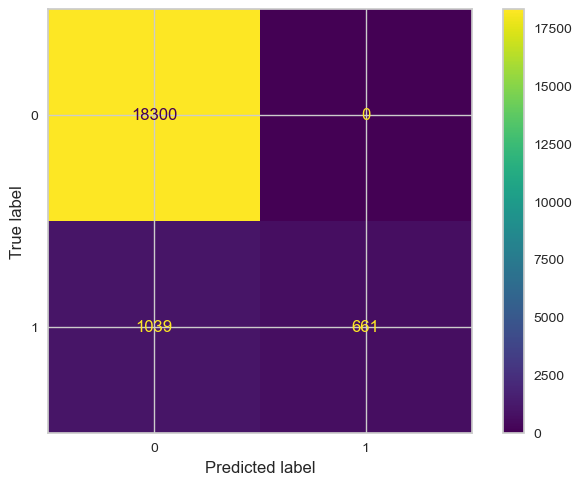

In [26]:
report_model(model = model)

In [27]:
cv = StratifiedKFold(n_splits=10)
# evaluate model
scores = cross_val_score(XGBClassifier(), X_train , y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores.mean())

0.9476999999999999


In [28]:
weights = [2, 3 , 25, 50, 100]
param_grid = dict(scale_pos_weight=weights)

grid = GridSearchCV(XGBClassifier(), param_grid = param_grid , cv = cv, scoring = 'recall' )

In [29]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, ...),
             n_jobs=None, param_grid={'scale_pos_weight': [2, 3, 25, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [30]:
print(f"best parameters: {grid.best_params_}")
print(f"best scores: {grid.best_score_}")
      

best parameters: {'scale_pos_weight': 100}
best scores: 0.9879411764705883


the accuracy on train set 0.560625
the accuracy on test set 0.55545

              precision    recall  f1-score   support

           0       1.00      0.52      0.68     18300
           1       0.16      0.99      0.27      1700

    accuracy                           0.56     20000
   macro avg       0.58      0.75      0.48     20000
weighted avg       0.93      0.56      0.65     20000



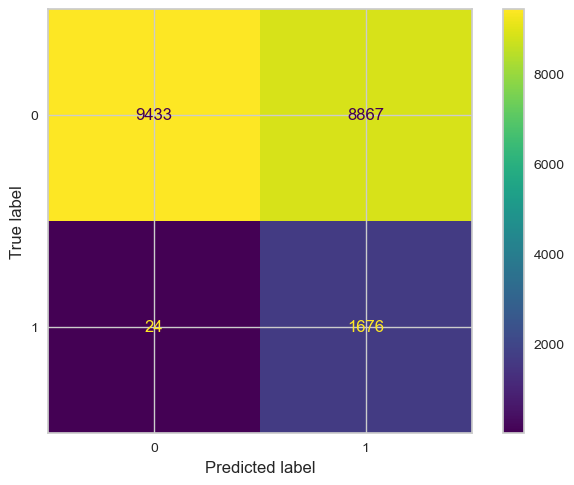

In [31]:
report_model(grid)

In [32]:
model2 = XGBClassifier(n_estimators= 100, max_depth = 5,  scale_pos_weight =  5 , random_state = 42,stratify=y )
model2.fit(X_train, y_train)

[01:20:29] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "stratify" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

the accuracy on train set 0.8692
the accuracy on test set 0.86985

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     18300
           1       0.36      0.70      0.48      1700

    accuracy                           0.87     20000
   macro avg       0.67      0.79      0.70     20000
weighted avg       0.92      0.87      0.89     20000



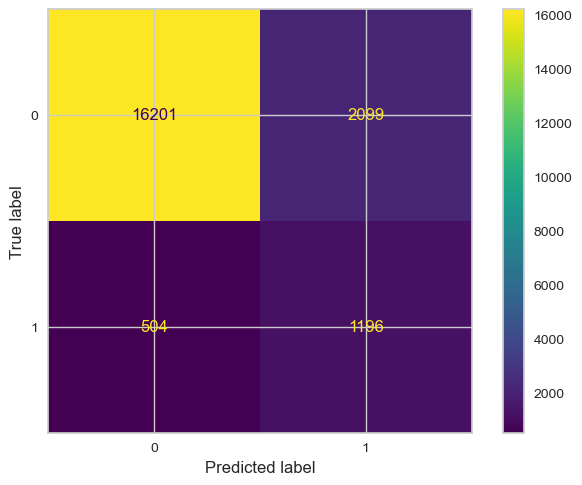

In [33]:
report_model(model2)